# Generate Fake Data for WFH Data

In [8]:
import pandas as pd
import numpy as np

In [130]:
import matplotlib.pyplot as plt

In [131]:
from sklearn import tree

## Create a model for the data

In [102]:
feature_names = ['health', 'weather', 'holiday']

In [120]:
class WFH:
    def __init__(self, d, n, probabilities=None):
        if probabilities is None:
            probabilities = (0.8, 0.2)
        self.probabilities = probabilities
        self.d = d
        self.n = n
        self.x = self._generate_binary_features()
        self.y = self._generate_target_values()
        
    def _generate_binary_features(self):
    
        feat = np.random.choice([0,1], (self.n, self.d)).tolist()
    
        return feat

    def _desired_y(self):

        y = []
        for i in self.x:
            if i == [1,1,0]:
                y.append(1)
            else:
                y.append(0)
        
        return y
    
    @staticmethod
    def _randomize_y(y, probabilities):
        
        first_val = y
        second_val = 1 if y == 0 else 0
        
        return np.random.choice([first_val, second_val], 1, p=probabilities)[0]
    
    def _generate_target_values(self):
        
        y = self._desired_y()
        y = [self._randomize_y(i, self.probabilities) for i in y]
        
        return y

## Generate Data

In [128]:
wfh = WFH(d=3, n=100, probabilities=(1,0))

In [137]:

df = pd.merge(
    pd.DataFrame(wfh.x, columns=feature_names), 
    pd.DataFrame(wfh.y, columns=['go_to_office']),
    how='left',
    left_index=True,
    right_index=True
)

In [138]:
print(
    df.sample(10).to_markdown()
)

|    |   health |   weather |   holiday |   go_to_office |
|---:|---------:|----------:|----------:|---------------:|
|  7 |        1 |         1 |         0 |              1 |
| 78 |        0 |         1 |         0 |              0 |
| 89 |        1 |         1 |         1 |              0 |
|  0 |        0 |         0 |         1 |              0 |
| 77 |        1 |         1 |         0 |              1 |
| 61 |        0 |         1 |         0 |              0 |
| 64 |        0 |         1 |         0 |              0 |
| 92 |        0 |         1 |         1 |              0 |
|  9 |        0 |         0 |         1 |              0 |
| 49 |        1 |         0 |         1 |              0 |


## Decision Tree

In [132]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(wfh.x, wfh.y)

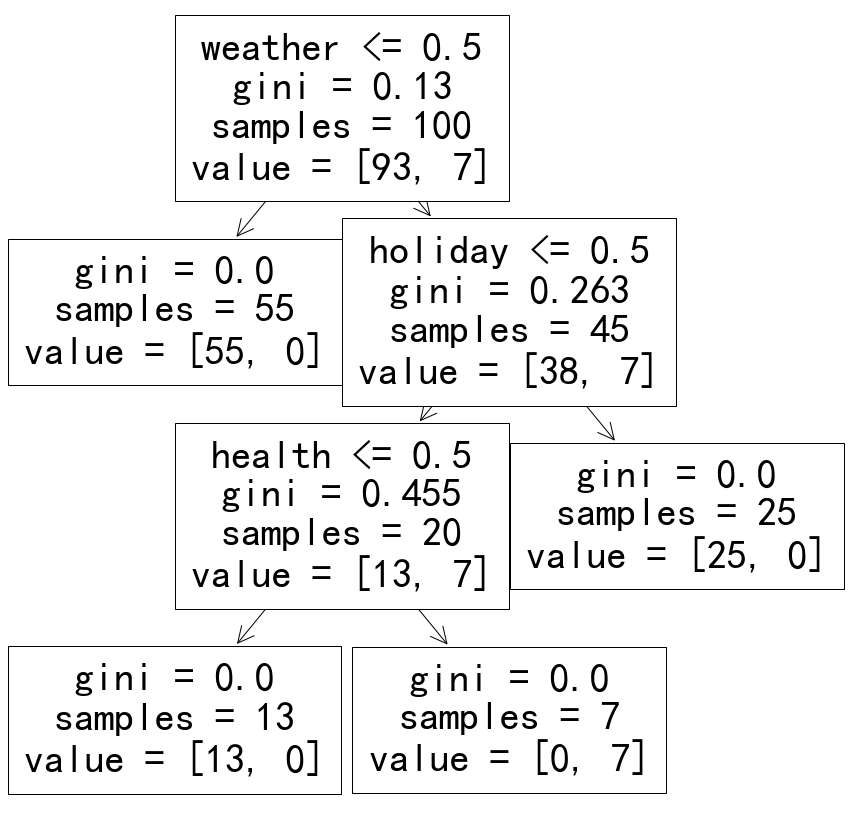

In [144]:
fig, ax=plt.subplots(figsize=(15,15))
tree.plot_tree(clf, feature_names=feature_names);

## Impure Data

In [140]:
wfh_impure = WFH(d=3, n=100, probabilities=(0.9,0.1))

In [153]:
clf_impure = tree.DecisionTreeClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=0.0001)
clf_impure = clf_impure.fit(wfh_impure.x, wfh_impure.y)

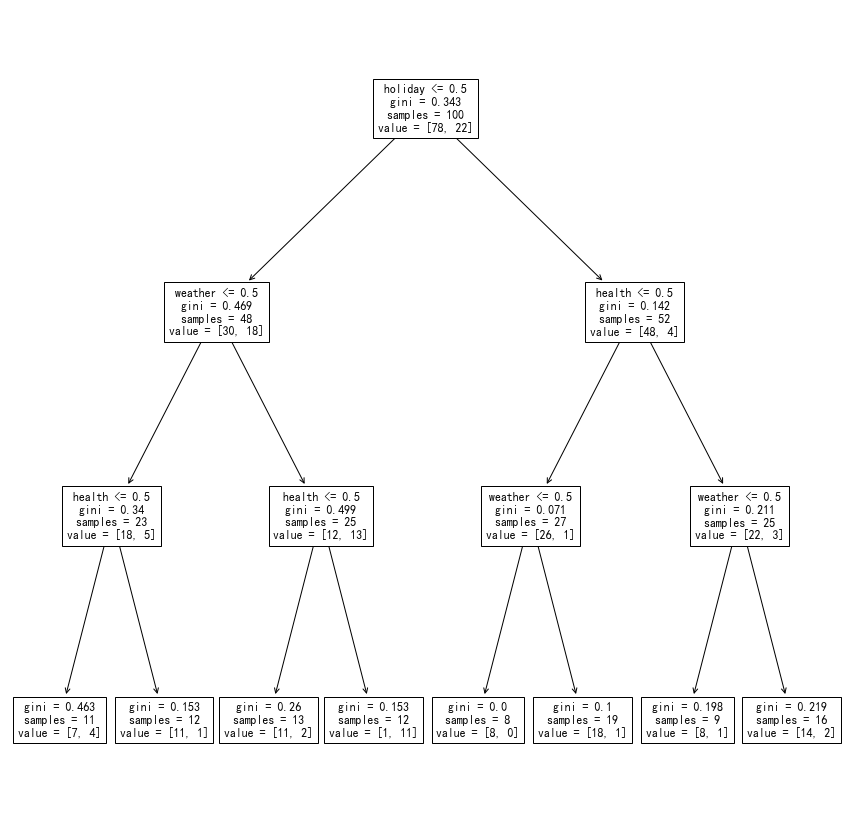

In [154]:
fig, ax = plt.subplots(figsize=(15,15))
tree.plot_tree(clf_impure, feature_names=feature_names);